In [88]:
import pandas as pd
dataset=pd.read_csv("C:/Users/Harshini/Downloads/mnc_salary.csv")
df=pd.DataFrame(dataset)
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [90]:
df.isnull().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [91]:
df.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


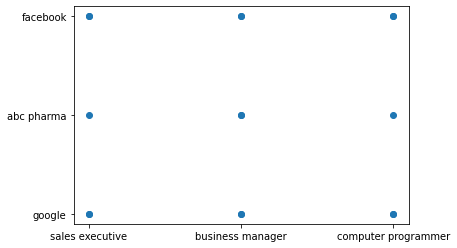

In [92]:
import matplotlib.pyplot as plt
plt.scatter(df["job"],df["company"])

In [93]:
df[df.duplicated()]

,company,job,degree,salary_more_then_100k


In [94]:
df.corr()

,salary_more_then_100k
salary_more_then_100k,1.0


In [95]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier

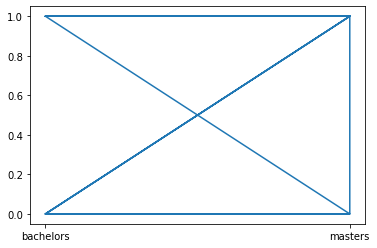

In [96]:
import matplotlib.pyplot as plt
plt.plot(df["degree"],df["salary_more_then_100k"])

In [97]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df["degree"]=le.fit_transform(df["degree"])
df["company"]=le.fit_transform(df["company"])
df["job"]=le.fit_transform(df["job"])


In [98]:
x=df.drop(["salary_more_then_100k"],axis=1)
y=df.iloc[:,3]

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12, 3), (4, 3), (12,), (4,))

In [100]:
for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])

In [101]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [102]:
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 0]


In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.5